In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df = pd.read_csv('C:\\Users\\Satyam\\Desktop\\Data Science\\Selfstudy\\Tech Mahindra\\Fault Prediction in Diesel Generator\\predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
df.drop(labels=['UDI','Product ID'], axis=1,inplace=True)

In [8]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [9]:
df.Type.unique()

array(['M', 'L', 'H'], dtype=object)

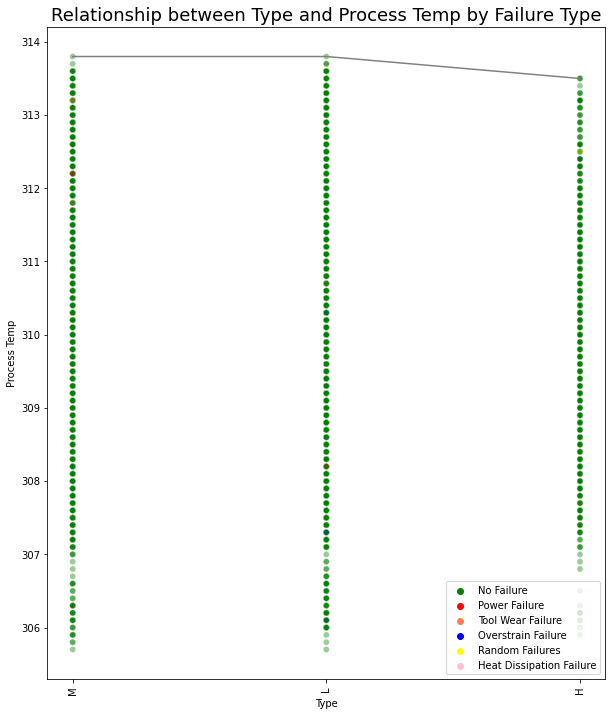

In [24]:
# Type vs Process Temp

# 1) palette used for hue color code
# 2) alpha used for opacity of data points
# 3) ax for any pre existing axes if any

plt.figure(figsize=(10,12))
ax = sn.scatterplot(x= 'Type', y= 'Process temperature [K]', 
                    hue= 'Failure Type', data= df,
                    palette= ['green','red','coral','blue','yellow','pink'],  
                    legend = 'full',
                    alpha = 0.4
                   )

# Getting the maximum process temp for each Type

max_temp = df.groupby('Type')['Process temperature [K]'].max()

sn.lineplot(data= max_temp, ax= ax.axes,
           color= 'grey')
ax.tick_params(axis= 'x', rotation=90)
plt.xlabel('Type')
plt.ylabel('Process Temp')
plt.title('Relationship between Type and Process Temp by Failure Type', fontsize= 18)
plt.savefig('Relationship between Type and Process Temp by Failure Type.jpg', )
             

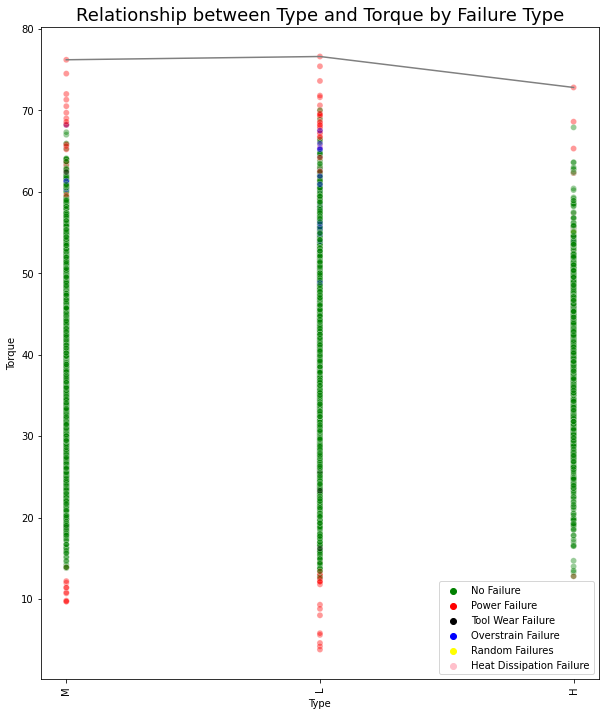

In [26]:
# Type vs Torque

# 1) palette used for hue color code
# 2) alpha used for opacity of data points
# 3) ax for any pre existing axes if any

plt.figure(figsize=(10,12))
ax = sn.scatterplot(x= 'Type', y= 'Torque [Nm]', 
                    hue= 'Failure Type', data= df,
                    palette= ['green','red','black','blue','yellow','pink'],  
                    legend = 'full',
                    alpha = 0.4
                   )

# Getting the maximum process temp for each Type

max_temp = df.groupby('Type')['Torque [Nm]'].max()

sn.lineplot(data= max_temp, ax= ax.axes,
           color= 'grey')
ax.tick_params(axis= 'x', rotation=90)
plt.xlabel('Type')
plt.ylabel('Torque')
plt.title('Relationship between Type and Torque by Failure Type', fontsize= 18)
plt.savefig('Relationship between Type and Torque by Failure Type.jpg', )
             

In [17]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

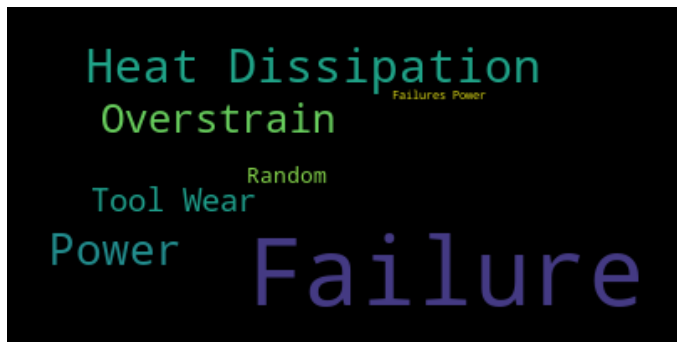

In [31]:
# Check wich Failure Type is dominating ---- Wordcloud library

from wordcloud import WordCloud

Failure_Type = " ".join( n for n in df['Failure Type'])

plt.figure(figsize=(12,18))
wc = WordCloud().generate(Failure_Type)
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('Dominant Data Points in Failure Type')

In [32]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

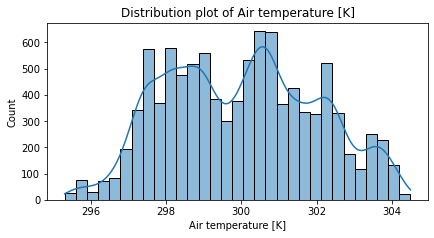

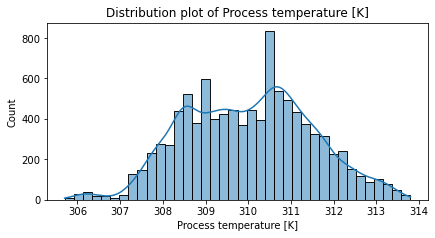

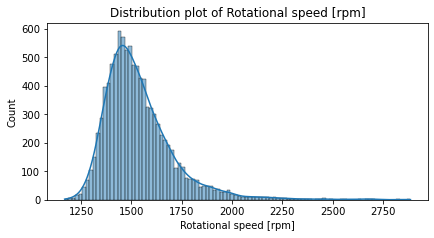

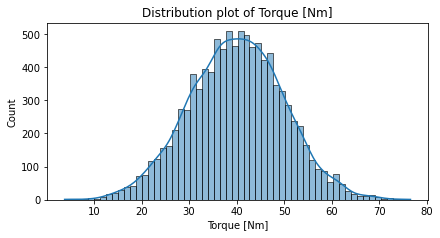

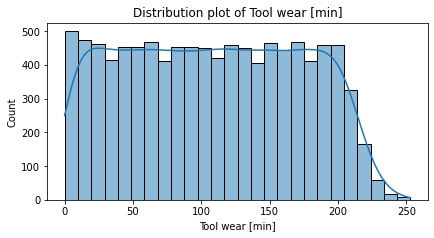

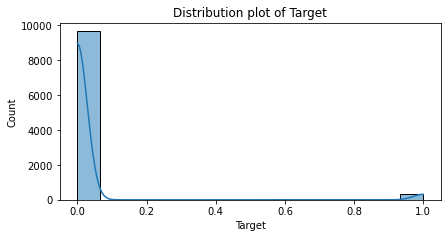

In [44]:
for i in df.columns:
    if df[i].dtypes != 'object':
        a = 1
        plt.figure(figsize=(15,15))
        plt.subplot(4,2,a)
        sn.histplot(x= df[i], kde= True)
        plt.title('Distribution plot of '+ i)
        a = a+1

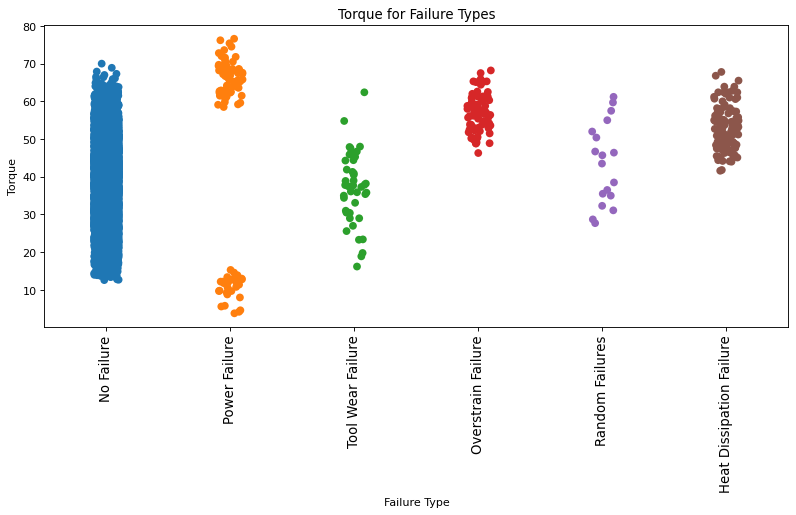

In [55]:
# Plot Torque for Failure Type

fig, ax= plt.subplots(figsize=(12,5), dpi=80)
sn.stripplot(x= 'Failure Type', y= 'Torque [Nm]', data= df, size= 7, ax= ax)
plt.tick_params(axis= 'x', which= 'major', labelsize= 12, rotation= 90)
plt.xlabel('Failure Type')
plt.ylabel('Torque')
plt.title('Torque for Failure Types')
plt.show()

In [ ]:
# Explore relationship between Type and Process Temp

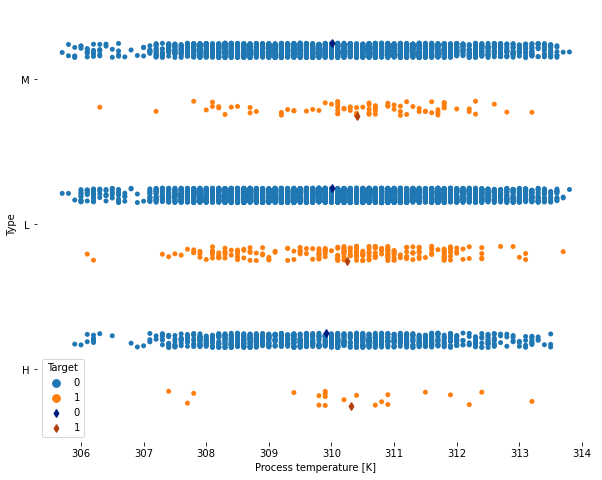

In [62]:
_, ax = plt.subplots(figsize=(10,8))
sn.despine(bottom=True, left=True)

sn.stripplot(x= 'Process temperature [K]',
              y= 'Type',
              hue= 'Target',
              data= df, dodge= 0.5, 
             zorder= 1)
             
sn.pointplot(x= 'Process temperature [K]',
              y= 'Type',
              join= False,
              hue= 'Target',
              data= df, dodge= 0.5, 
              palette= 'dark', markers='d',
              scale= 0.75, ci= None
             )
          

handles, labels = ax.get_legend_handles_labels()

In [65]:
from sklearn.impute import KNNImputer

In [64]:
Imputer = KNNImputer()

In [ ]:
KNN